In [1]:
import sqlite3
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
con = sqlite3.connect('data/ct_investimentos.db')

cursor = con.cursor()

portfolio_tuples = cursor.execute('SELECT * FROM vw_carteira_consolidada').fetchall()

portfolio = pd.DataFrame(portfolio_tuples, columns=['stock', 'amount', 'avg_price'])

portfolio

,stock,amount,avg_price
0,AESB3,100,13.91
1,BBAS3,50,33.40
2,BCFF11,15,88.47
3,ENBR3,70,19.97
4,GOAU4,100,11.07
5,IRBR3,300,6.52
6,ITSA4,155,10.70
7,KNCR11,5,101.57
8,RANI3,100,6.96
9,SAPR4,200,3.99


In [3]:
portfolio_prep = sorted([stock + '.SA' for stock in portfolio['stock'] if stock not in ['XPLG11', 'BCFF11', 'XPPR11', 'KNCR11']])

stocks = ' '.join(portfolio_prep)

stocks # required format to be read by Yahoo Finance download method

'AESB3.SA BBAS3.SA ENBR3.SA GOAU4.SA IRBR3.SA ITSA4.SA RANI3.SA SAPR4.SA'

In [4]:
start_date = cursor.execute('SELECT data_negocio FROM tb_negociacoes ORDER BY data_negocio LIMIT 1').fetchone()

con.close()

start_date[0]

'2019-11-21'

In [5]:

portfolio_historic_info = yf.download(stocks, start=start_date[0], end='2022-08-08')

portfolio_historic_info.head(10)

[*********************100%***********************]  8 of 8 completed


Adj Close                                                        \
            AESB3.SA   BBAS3.SA   ENBR3.SA  GOAU4.SA   IRBR3.SA   ITSA4.SA   
Date                                                                         
2019-11-21       NaN  39.050392  15.862531  5.725354  33.146904  11.380101   
2019-11-22       NaN  39.674179  15.895927  5.822903  33.235229  11.548571   
2019-11-25       NaN  39.546886  15.929321  5.860422  33.129242  11.270595   
2019-11-26       NaN  39.037701  16.054554  6.002992  32.608147  11.001047   
2019-11-27       NaN  40.174881  16.096294  5.995489  32.696468  11.135820   
2019-11-28       NaN  40.395523  16.330059  5.927955  33.208733  11.161092   
2019-11-29       NaN  40.573742  16.605564  5.852918  32.793625  11.177940   
2019-12-02       NaN  40.251266  16.513729  6.040511  32.855450  11.270738   
2019-12-03       NaN  41.065952  16.722452  5.890436  32.873116  11.245428   
2019-12-04       NaN  41.660011  16.780888  5.942963  32.590481  11.515385   

                                  Close             ...     Open            \
            RANI3.SA  SAPR4.SA AESB3.SA   BBAS3.SA  ... RANI3.SA  SAPR4.SA   
Date                                                ...                      
2019-11-21  2.666995  5.313455      NaN  46.380001  ...     3.12  6.066666   
2019-11-22  2.684257  5.388865      NaN  46.750000  ...     3.10  6.110000   
2019-11-25  2.701519  5.374363      NaN  46.599998  ...     3.11  6.160000   
2019-11-26  2.666995  5.220644      NaN  46.000000  ...     3.10  6.203333   
2019-11-27  2.718781  5.220644      NaN  47.340000  ...     3.05  6.003333   
2019-11-28  2.710150  5.385964      NaN  47.599998  ...     3.19  5.993333   
2019-11-29  2.675626  5.365661      NaN  47.810001  ...     3.12  6.166666   
2019-12-02  2.658364  5.356960      NaN  47.430000  ...     3.20  6.190000   
2019-12-03  2.649733  5.342460      NaN  48.389999  ...     3.08  6.266666   
2019-12-04  2.649733  5.391765      NaN  49.090000  ...     3.09  6.146666   

             Volume                                                            \
           AESB3.SA    BBAS3.SA   ENBR3.SA    GOAU4.SA   IRBR3.SA    ITSA4.SA   
Date                                                                            
2019-11-21      NaN  11252800.0  1960900.0  20224400.0  6386329.0  17802120.0   
2019-11-22      NaN   7639800.0  1393900.0  12106300.0  4367748.0  15813735.0   
2019-11-25      NaN   7430100.0  1421100.0  16224300.0  3903520.0  22080345.0   
2019-11-26      NaN  15330000.0  2193900.0  16028200.0  7319222.0  39549405.0   
2019-11-27      NaN  11237900.0  2375900.0  10692000.0  5697778.0  15820140.0   
2019-11-28      NaN   6909900.0  3769000.0   8557800.0  4162254.0  12414675.0   
2019-11-29      NaN   7285500.0  3125200.0   8177900.0  5248592.0  15889335.0   
2019-12-02      NaN   9727400.0  2706400.0  15083200.0  4042572.0  14032620.0   
2019-12-03      NaN  17536700.0  2392600.0   7953000.0  3491342.0  15411165.0   
2019-12-04      NaN  15029100.0  2027600.0   8680900.0  3697918.0  16882845.0   

                                
           RANI3.SA   SAPR4.SA  
Date                            
2019-11-21   2400.0   648900.0  
2019-11-22   1500.0   645900.0  
2019-11-25   7200.0   936600.0  
2019-11-26   1400.0  1518600.0  
2019-11-27   5100.0  1523400.0  
2019-11-28   2200.0  1087800.0  
2019-11-29   1800.0   641400.0  
2019-12-02  61600.0  2332200.0  
2019-12-03   8900.0  1574700.0  
2019-12-04   9900.0  1715400.0  

[10 rows x 48 columns]

In [6]:
adj_close = portfolio_historic_info['Adj Close']

holding_period_return = round(((adj_close.iloc[-1] - adj_close.iloc[0]) / adj_close.iloc[0]) * 100, 2)

holding_period_return

AESB3.SA       NaN
BBAS3.SA     -3.71
ENBR3.SA     39.64
GOAU4.SA     73.56
IRBR3.SA    -93.15
ITSA4.SA    -21.53
RANI3.SA    173.09
SAPR4.SA    -29.61
dtype: float64

In [7]:
portfolio_corr_matrix = adj_close.corr(method='pearson')

portfolio_corr_matrix

,AESB3.SA,BBAS3.SA,ENBR3.SA,GOAU4.SA,IRBR3.SA,ITSA4.SA,RANI3.SA,SAPR4.SA
AESB3.SA,1.000000,-0.555297,-0.767185,0.241538,0.878015,0.426781,0.132316,0.280552
BBAS3.SA,-0.555297,1.000000,0.548179,0.090678,0.682105,0.742158,0.004427,0.507529
ENBR3.SA,-0.767185,0.548179,1.000000,0.634742,-0.091510,0.339273,0.530658,-0.256869
GOAU4.SA,0.241538,0.090678,0.634742,1.000000,-0.400631,0.348540,0.885596,-0.645064
IRBR3.SA,0.878015,0.682105,-0.091510,-0.400631,1.000000,0.555157,-0.497916,0.770373
ITSA4.SA,0.426781,0.742158,0.339273,0.348540,0.555157,1.000000,0.210428,0.259064
RANI3.SA,0.132316,0.004427,0.530658,0.885596,-0.497916,0.210428,1.000000,-0.657056
SAPR4.SA,0.280552,0.507529,-0.256869,-0.645064,0.770373,0.259064,-0.657056,1.000000


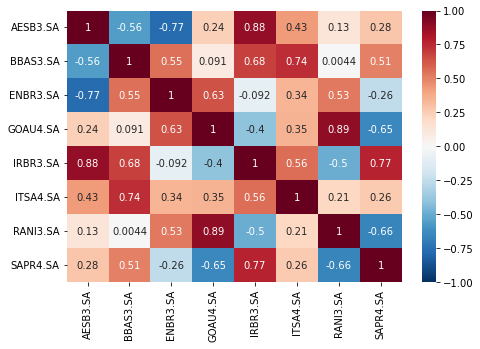

In [8]:
plt.figure(figsize=(7.5, 5))
sns.heatmap(portfolio_corr_matrix, annot=True, cmap='RdBu_r', vmin=-1, vmax=1, center=0)
plt.xlabel('')
plt.ylabel('');